In [174]:
import os
import pandas as pd
import numpy as py
os.chdir("D:\Data Science\Third_Project")

In [175]:
customer_train_data=pd.read_csv("Train_data.csv")
customer_test_data=pd.read_csv("Test_data.csv")

In [176]:
#Import Missing values using KNN
from fancyimpute import KNN
customer_train_data=pd.DataFrame(KNN(k=5).complete(customer_train_data),columns=customer_train_data.columns)
customer_test_data=pd.DataFrame(KNN(k=5).complete(customer_test_data),columns=customer_test_data.columns)

{'whiskers': [<matplotlib.lines.Line2D at 0x218f0e172e8>,
 'caps': [<matplotlib.lines.Line2D at 0x218f0e06240>,
 'boxes': [<matplotlib.lines.Line2D at 0x218f0e220b8>],
 'medians': [<matplotlib.lines.Line2D at 0x218f0cf4a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x218f09b9400>],
 'means': []}

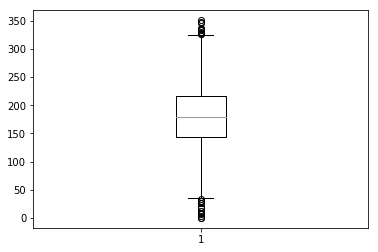

In [177]:
#Detect Outliers
import matplotlib.pyplot as plt
plt.boxplot(customer_train_data['total day minutes'])
#customer_train_data.columns

In [178]:
cnames=[ 'account length', 'area code',
         'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls']

float_values=['total day minutes','total day charge','total eve minutes',
              'total eve charge','total night minutes','total night charge','total intl minutes',
              'total intl charge']

for i in float_values:
    customer_train_data[i]=customer_train_data[i].astype(int)

In [179]:
#Detect and delete outliers from train data
for i in cnames:
    q75,q25=py.percentile(customer_train_data.loc[:,i],[75,25])
    iqr=q75-q25
    min_value = q25 - (iqr*1.5)
    max_value = q75 + (iqr*1.5)
    customer_train_data=customer_train_data.drop(customer_train_data[customer_train_data.loc[:,i]<min_value].index)
    customer_train_data=customer_train_data.drop(customer_train_data[customer_train_data.loc[:,i]>max_value].index)

In [180]:
customer_train_data.shape

(2758, 21)

In [181]:
cnames_test=[ 'account length', 'area code',
         'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls']

float_values_test=['total day minutes','total day charge','total eve minutes',
              'total eve charge','total night minutes','total night charge','total intl minutes',
              'total intl charge']

for i in float_values_test:
    customer_test_data[i]=customer_test_data[i].astype(int)

In [182]:
#Detect and delete outliers from test data
for i in cnames_test:
    q75,q25=py.percentile(customer_test_data.loc[:,i],[75,25])
    iqr=q75-q25
    min_value = q25 - (iqr*1.5)
    max_value = q75 + (iqr*1.5)
    customer_test_data=customer_test_data.drop(customer_test_data[customer_test_data.loc[:,i]<min_value].index)
    customer_test_data=customer_test_data.drop(customer_test_data[customer_test_data.loc[:,i]>max_value].index)

In [183]:
customer_test_data.shape

(734, 21)

In [184]:
#Outliers Removed Data
customer_train_data=pd.read_csv("Outliers_Removed_Train_Data.csv")
customer_test_data=pd.read_csv("Outliers_Removed_Test_Data.csv")

In [185]:
cnames_train_loaded=['account.length', 'area.code', 
        'number.vmail.messages','total.day.minutes', 'total.day.calls', 'total.day.charge',
       'total.eve.minutes', 'total.eve.calls', 'total.eve.charge',
       'total.night.minutes', 'total.night.calls', 'total.night.charge',
       'total.intl.minutes', 'total.intl.calls', 'total.intl.charge',
       'number.customer.service.calls']


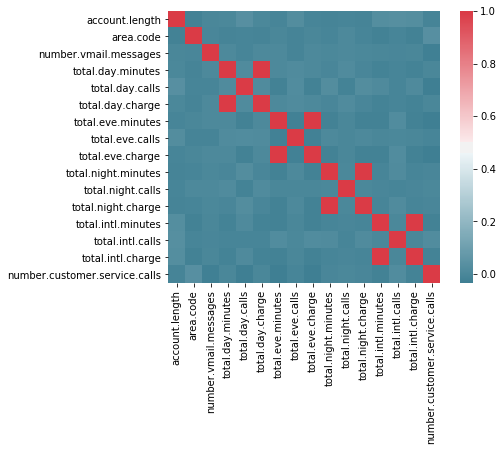

In [186]:
#correlation plot
import seaborn as sns
import matplotlib.pyplot as plt
df_corr=customer_train_data.loc[:,cnames_train_loaded]

#set height and width of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=py.zeros_like(corr, dtype=py.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [187]:
cnames_test_loaded=['account.length', 'area.code', 
        'number.vmail.messages','total.day.minutes', 'total.day.calls', 'total.day.charge',
       'total.eve.minutes', 'total.eve.calls', 'total.eve.charge',
       'total.night.minutes', 'total.night.calls', 'total.night.charge',
       'total.intl.minutes', 'total.intl.calls', 'total.intl.charge',
       'number.customer.service.calls']

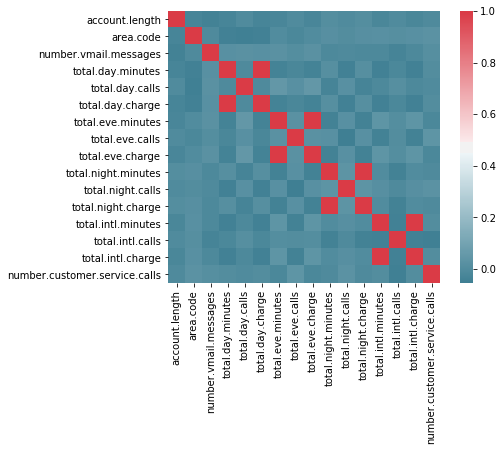

In [188]:
#correlation plot
import seaborn as sns
df_corr=customer_test_data.loc[:,cnames_test_loaded]

#set height and width of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=py.zeros_like(corr, dtype=py.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [189]:
customer_train_data=customer_train_data.drop(['total.day.charge','total.eve.charge','total.night.charge','total.intl.charge','area.code','account.length',
                                              'total.day.calls','total.eve.calls','total.night.calls'],axis=1)
customer_test_data=customer_test_data.drop(['total.day.charge','total.eve.charge','total.night.charge','total.intl.charge'
                                           ,'area.code','account.length','total.day.calls','total.eve.calls','total.night.calls'],axis=1)

In [190]:
#Chi-Square Test for train data:
catnames_train=['state','phone.number','international.plan','voice.mail.plan','Churn']

In [191]:
from scipy.stats import chi2_contingency
for i in catnames_train:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(customer_train_data['Churn'], customer_train_data[i]))
    print(p)

state
0.00229622155201
phone.number
0.491856084559
international.plan
2.49310770332e-50
voice.mail.plan
5.15063965904e-09
Churn
0.0


In [192]:
#Chi-Square Test for test data:
catnames_test=['state','phone.number','international.plan','voice.mail.plan','Churn']

In [193]:
for i in catnames_train:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(customer_test_data['Churn'], customer_test_data[i]))
    print(p)

state
0.0470412805642
phone.number
0.488484303652
international.plan
3.19602095723e-25
voice.mail.plan
1.34189390001e-07
Churn
0.0


In [194]:
customer_train_data=customer_train_data.drop(['phone.number','state'],axis=1)
customer_test_data=customer_test_data.drop(['phone.number','state'],axis=1)
#customer_train_data.shape

In [195]:
#Decision Tree Development
from sklearn import tree
customer_train_data['international.plan']=customer_train_data['international.plan'].replace(' yes',1)
customer_train_data['international.plan']=customer_train_data['international.plan'].replace(' no',0)
customer_train_data['voice.mail.plan']=customer_train_data['voice.mail.plan'].replace(' yes',1)
customer_train_data['voice.mail.plan']=customer_train_data['voice.mail.plan'].replace(' no',0)
#Test Data
customer_test_data['international.plan']=customer_train_data['international.plan'].replace(' yes',1)
customer_test_data['international.plan']=customer_train_data['international.plan'].replace(' no',0)
customer_test_data['voice.mail.plan']=customer_train_data['voice.mail.plan'].replace(' yes',1)
customer_test_data['voice.mail.plan']=customer_train_data['voice.mail.plan'].replace(' no',0)


In [147]:
#C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_Train,Y_Train)
#customer_train_data.shape
#customer_train_data.head(20)

In [196]:
customer_train_data['Churn']=customer_train_data['Churn'].replace(' False.','No')
customer_train_data['Churn']=customer_train_data['Churn'].replace(' True.','Yes')
customer_test_data['Churn']=customer_test_data['Churn'].replace(' False.','No')
customer_test_data['Churn']=customer_test_data['Churn'].replace(' True.','Yes')
X=customer_train_data.values[:,0:9]
Y=customer_train_data.values[:,9]
x=customer_test_data.values[:,0:9]
y=customer_test_data.values[:,9]


In [197]:
customer_test_data.head(5)

,international.plan,voice.mail.plan,number.vmail.messages,total.day.minutes,total.eve.minutes,total.night.minutes,total.intl.minutes,total.intl.calls,number.customer.service.calls,Churn
0,0,1,0,70.9,211.9,236.0,10.6,3.0,3.0,No
1,0,1,0,223.6,244.8,94.2,9.5,7.0,0.0,No
2,0,0,29,294.7,237.3,300.3,13.7,6.0,1.0,No
3,1,0,0,216.8,126.4,220.6,15.7,2.0,1.0,No
4,1,0,0,197.4,124.0,204.5,7.7,4.0,2.0,No


In [198]:
c50_model=tree.DecisionTreeClassifier(criterion='entropy').fit(X,Y)

In [199]:
c50_Predictions=c50_model.predict(x)

In [200]:
Confusion_Matrix = pd.crosstab(y,c50_Predictions)

#let us save TP, TN, FP, FN
TN = Confusion_Matrix.iloc[0,0]
FN = Confusion_Matrix.iloc[1,0]
TP = Confusion_Matrix.iloc[1,1]
FP = Confusion_Matrix.iloc[0,1]

In [201]:
#Accuracy for Decision Tree
((TP+TN)*100)/(TP+TN+FP+FN) #86.14

85.542891421715652

In [202]:
#False Negative Rate
(FN*100)/(FN+TP) #50.0

52.232142857142854

In [203]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X,Y)

In [204]:
RF_Predictions = RF_model.predict(x)

In [205]:
#Confusion Matrix

Confusion_Matrix_RF = pd.crosstab(y,RF_Predictions)

#let us save TP, TN, FP, FN
TN = Confusion_Matrix_RF.iloc[0,0]
FN = Confusion_Matrix_RF.iloc[1,0]
TP = Confusion_Matrix_RF.iloc[1,1]
FP = Confusion_Matrix_RF.iloc[0,1]

In [206]:
#Accuracy
((TP+TN)*100)/(TP+TN+FP+FN)#87.04

87.102579484103174

In [207]:
#False Negative Rate
(FN*100)/(FN+TP)#69.6

69.642857142857139